In [71]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
#importing required libereries
sns.set_theme(style='whitegrid')
%matplotlib inline
df=pd.read_csv("Clean_Dataset.csv")    #loading data present in the same folder
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [72]:
df.info()
df.describe()
df.columns
df.isnull().sum()
#data checking 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

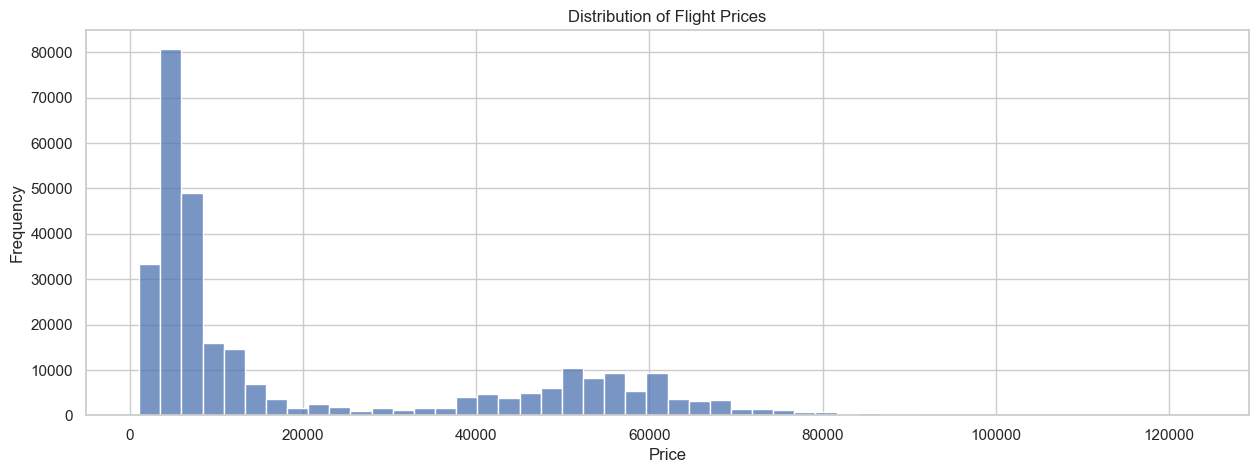

In [73]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'], bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
#ploting basic graphs for information 


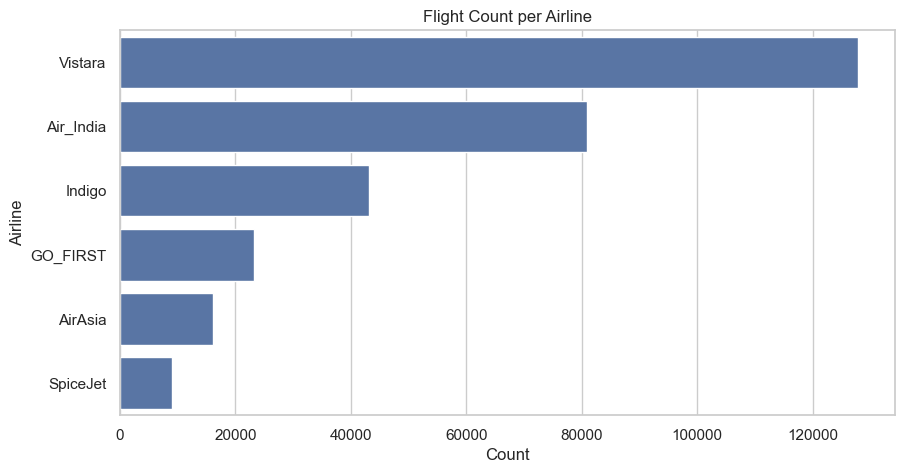

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title("Flight Count per Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()
#ploting graphs for understanding datsset


In [75]:
df["class"]=df["class"].replace({
    'Economy':1,
    'Business':0
})
#changing "Economy" "Business" to 1 and 0 making it easy for model to understad 


C:\Users\Yash\AppData\Local\Temp\ipykernel_10068\2257824448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"]=df["class"].replace({


In [76]:
df["departure_time"]=df["departure_time"].replace({
    'Early_Morning':0,
    'Morning':1,
    'Afternoon':2,
    'Evening':3,
    'Night':4,
    'Late_Night':5
})
#changing timings to integer line 0,1,2.... making easy for model


C:\Users\Yash\AppData\Local\Temp\ipykernel_10068\2925434300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["departure_time"]=df["departure_time"].replace({


In [77]:
# sor_city=input()
# des_city=input()



In [78]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform
df['source_city_encoded'] = le.fit_transform(df['source_city'])
# Print the mapping
for i, city in enumerate(le.classes_):
    print(f"{city} → {i}")
"""Bangalore → 0
Chennai → 1
Delhi → 2
Hyderabad → 3
Kolkata → 4
Mumbai → 5"""

Bangalore → 0
Chennai → 1
Delhi → 2
Hyderabad → 3
Kolkata → 4
Mumbai → 5


'Bangalore → 0\nChennai → 1\nDelhi → 2\nHyderabad → 3\nKolkata → 4\nMumbai → 5'

In [ ]:
# source_city	departure_time	stops	arrival_time	destination_city	class	duration	days_left	price
# features=['source_city','destination_city','class','duration','days_left','departure_time']
# x=pd.get_dummies(df[features], drop_first=True)
# y=df['price']
# x_array=np.array(x)
# y_array=np.array(y)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['source_city'] = le.fit_transform(df['source_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df['departure_time'] = le.fit_transform(df['departure_time'])

features = ['source_city', 'destination_city', 'class', 'duration', 'days_left', 'departure_time']
X = df[features]
y = df['price']

x_array = np.array(X)
y_array = np.array(y)
# y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6


In [95]:
def com_cost(x,y,w,b):
    # Calculate the cost function
    m=x.shape[0]
    total_cost=0
    cost=0
    for i in range(m):
        fx=0
        fx=np.dot(w,x[i])+b
        cost+=(fx-y[i])**2
    total_cost=cost/(2*m)
    return total_cost


In [99]:
i_w=[0.1,0.1,0.1,0.1,0.1,0.1]
init_w=np.array(i_w)
init_b=0
x=com_cost(x_array,y_array,init_w,init_b)
print("cost :",x)
# checking cost for some random values of w and b 


cost : 475686827.4259583


The expected value for this value of w and b should be 475686827.4259583. If then its correct because of the random values of w and b 